<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [1]:
%%capture
!pip install sqlalchemy==1.3.9


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
%%capture
!pip install ipython-sql
!pip install ipython-sql prettytable

In [3]:
%load_ext sql

In [4]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
%%capture
!pip install -q pandas

In [6]:
%sql sqlite:///my_data1.db

In [7]:
%%capture
!pip install seaborn

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [9]:
df#['Booster_Version'].loc[101]

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
...,...,...,...,...,...,...,...,...,...,...
96,2020-11-05,23:24:23,F9 B5B1062.1,CCAFS SLC-40,"GPS III-04 , Crew-1",4311,MEO,USSF,Success,Success
97,2020-11-16,0:27:00,F9 B5B1061.1,KSC LC-39A,"Crew-1, Sentinel-6 Michael Freilich",12500,LEO (ISS),NASA (CCP),Success,Success
98,2020-11-21,17:17:08,F9 B5B1063.1,VAFB SLC-4E,"Sentinel-6 Michael Freilich, Starlink 15 v1.0",1192,LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success
99,2020-11-25,2:13:00,F9 B5 B1049.7,CCAFS SLC-40,"Starlink 15 v1.0, SpaceX CRS-21",15600,LEO,SpaceX,Success,Success


In [10]:
df.shape

(101, 10)

In [ ]:
#df.to_csv('jupyter-labs-eda-sql-coursera_sqllite.csv', index=False)

In [12]:
df['Launch_Site'].value_counts()

Launch_Site
CCAFS SLC-40    34
CCAFS LC-40     26
KSC LC-39A      25
VAFB SLC-4E     16
Name: count, dtype: int64

**Note:This below code is added to remove blank rows from table**


In [10]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [11]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [72]:
%sql select * from SPACEXTBL limit 15

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
2013-09-29,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500,Polar LEO,MDA,Success,Uncontrolled (ocean)
2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)


In [13]:
%sql select count(*) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


count(*)
101


In [14]:
%sql select DISTINCT(Launch_Site) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [78]:
%sql select * from SPACEXTBL where Launch_Site = 'CCAFS LC-40'


 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)
2014-08-05,8:00:00,F9 v1.1,CCAFS LC-40,AsiaSat 8,4535,GTO,AsiaSat,Success,No attempt



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [15]:
%sql select * from SPACEXTBL where Launch_Site like 'CCA%' limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [16]:
%sql select * from SPACEXTBL limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [17]:
%sql select * from SPACEXTBL order by Date DESC limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2020-12-06,16:17:08,F9 B5 B1058.4,KSC LC-39A,SpaceX CRS-21,2972,LEO (ISS),NASA (CRS),Success,Success
2020-11-25,2:13:00,F9 B5 B1049.7,CCAFS SLC-40,"Starlink 15 v1.0, SpaceX CRS-21",15600,LEO,SpaceX,Success,Success
2020-11-21,17:17:08,F9 B5B1063.1,VAFB SLC-4E,"Sentinel-6 Michael Freilich, Starlink 15 v1.0",1192,LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success
2020-11-16,0:27:00,F9 B5B1061.1,KSC LC-39A,"Crew-1, Sentinel-6 Michael Freilich",12500,LEO (ISS),NASA (CCP),Success,Success
2020-11-05,23:24:23,F9 B5B1062.1,CCAFS SLC-40,"GPS III-04 , Crew-1",4311,MEO,USSF,Success,Success


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [18]:
%sql select SUM(PAYLOAD_MASS__KG_) from SPACEXTBL where Customer = 'NASA (CRS)'

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
45596


In [19]:
%sql select SUM(PAYLOAD_MASS__KG_) from SPACEXTBL where Customer not like'%NASA%'

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
512957


In [20]:
%sql select SUM(PAYLOAD_MASS__KG_) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
619967


In [21]:
#%sql select DISTINCT(Customer) from SPACEXTBL

### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [22]:
sql_query = "select 'F9 v1.1' as Booster_Version, AVG(PAYLOAD_MASS__KG_) as Avg_Payload from SPACEXTBL where Booster_Version like 'F9 v1.1%';"
F9_v11 = pd.read_sql_query(sql_query, con)

In [23]:
F9_v11

,Booster_Version,Avg_Payload
0,F9 v1.1,2534.666667


In [24]:
sql_query = "select 'F9 v1.0' as Booster_Version, AVG(PAYLOAD_MASS__KG_) as Avg_Payload from SPACEXTBL where Booster_Version like 'F9 v1.0%';"
F9_v10 = pd.read_sql_query(sql_query, con)

In [25]:
F9_v10

,Booster_Version,Avg_Payload
0,F9 v1.0,340.4


In [26]:
sql_query = "select 'F9 FT' as Booster_Version, AVG(PAYLOAD_MASS__KG_) as Avg_Payload from SPACEXTBL where Booster_Version like 'F9 FT%';"
F9_FT = pd.read_sql_query(sql_query, con)

In [27]:
F9_FT

,Booster_Version,Avg_Payload
0,F9 FT,4568.833333


In [28]:
sql_query = "select 'F9 B4' as Booster_Version, AVG(PAYLOAD_MASS__KG_) as Avg_Payload from SPACEXTBL where Booster_Version like 'F9 B4%';"
F9_B4 = pd.read_sql_query(sql_query, con)

In [29]:
F9_B4

,Booster_Version,Avg_Payload
0,F9 B4,4970.166667


In [30]:
sql_query = "select 'F9 B5' as Booster_Version, AVG(PAYLOAD_MASS__KG_) as Avg_Payload from SPACEXTBL where Booster_Version like 'F9 B5%'"
F9_B5 = pd.read_sql_query(sql_query, con)

In [31]:
F9_B5

,Booster_Version,Avg_Payload
0,F9 B5,9132.244444


In [32]:
ave_payload_df = pd.concat([F9_v11, F9_v10, F9_FT, F9_B4, F9_B5], ignore_index=True)
ave_payload_df = round(ave_payload_df.sort_values('Avg_Payload'), 2)
ave_payload_df

,Booster_Version,Avg_Payload
1,F9 v1.0,340.40
0,F9 v1.1,2534.67
2,F9 FT,4568.83
3,F9 B4,4970.17
4,F9 B5,9132.24


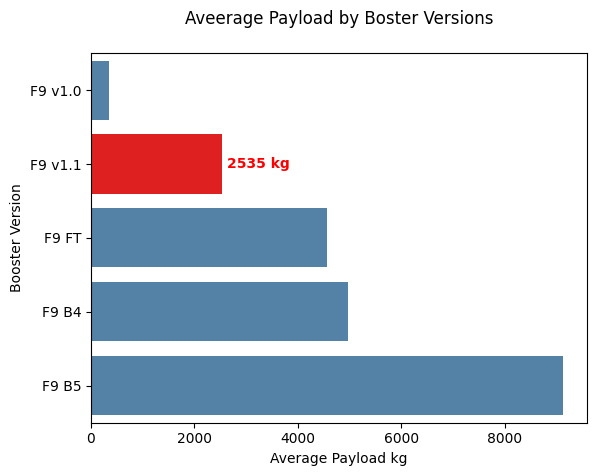

In [33]:
# Choose the booster you want to highlight
highlight = "F9 v1.1"

# Assign colors: one for the highlight, one for the rest
colors = ['red' if x == highlight else 'steelblue' for x in ave_payload_df['Booster_Version']]

# Create the barplot with custom colors
ax = sns.barplot(data=ave_payload_df, 
                 x='Avg_Payload', 
                 y='Booster_Version', 
                 hue = 'Booster_Version',
                 palette=colors)

# Add labels on top of each bar
for i, (value, label) in enumerate(zip(ave_payload_df['Avg_Payload'], ave_payload_df['Booster_Version'])):
    if label == highlight:
        ax.text(value + 100, i, f"{value:.0f} kg", va='center', fontweight='bold', color='red')



plt.ylabel('Booster Version')
plt.xlabel('Average Payload kg')
plt.title('Aveerage Payload by Boster Versions\n')
plt.show()

In [34]:
ave_payload_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booster_Version  5 non-null      object 
 1   Avg_Payload      5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [35]:
%sql select sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL where Booster_Version like '%F9 v1.1%'

 * sqlite:///my_data1.db
Done.


Total
38020


In [36]:
%sql select sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL where Booster_Version like '%F9 v1.0%'

 * sqlite:///my_data1.db
Done.


Total
1702


In [37]:
#ave_payload

In [38]:
%sql select sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL where Booster_Version like '%F9 FT%'

 * sqlite:///my_data1.db
Done.


Total
109652


In [39]:
%sql select sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL where Booster_Version like '%F9 B4%'

 * sqlite:///my_data1.db
Done.


Total
59642


In [40]:
%sql select sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL where Booster_Version like '%F9 B5%'

 * sqlite:///my_data1.db
Done.


Total
410951


In [41]:
%sql select Booster_Version, PAYLOAD_MASS__KG_ from SPACEXTBL where Booster_Version not like '%F9 v1.1%'

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 v1.0 B0003,0
F9 v1.0 B0004,0
F9 v1.0 B0005,525
F9 v1.0 B0006,500
F9 v1.0 B0007,677
F9 FT B1019,2034
F9 FT B1020,5271
F9 FT B1021.1,3136
F9 FT B1022,4696
F9 FT B1023.1,3100


In [42]:
%sql select SUM(PAYLOAD_MASS__KG_) from SPACEXTBL where Booster_Version not like '%F9 v1.1%'

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
581947


In [43]:
%sql select Booster_Version, PAYLOAD_MASS__KG_ from SPACEXTBL where Booster_Version like '%F9 v1.1%'

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 v1.1 B1003,500
F9 v1.1,3170
F9 v1.1,3325
F9 v1.1,2296
F9 v1.1,1316
F9 v1.1,4535
F9 v1.1 B1011,4428
F9 v1.1 B1010,2216
F9 v1.1 B1012,2395
F9 v1.1 B1013,570


In [44]:
%sql select DISTINCT(Booster_Version) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 v1.0 B0003
F9 v1.0 B0004
F9 v1.0 B0005
F9 v1.0 B0006
F9 v1.0 B0007
F9 v1.1 B1003
F9 v1.1
F9 v1.1 B1011
F9 v1.1 B1010
F9 v1.1 B1012


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [45]:
%sql select DISTINCT(Mission_Outcome) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


Mission_Outcome
Success
Failure (in flight)
Success (payload status unclear)
Success


In [46]:
%sql select DISTINCT(Landing_Outcome) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [47]:
%sql select * from SPACEXTBL where Landing_Outcome like '%ground pad%'

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2015-12-22,1:29:00,F9 FT B1019,CCAFS LC-40,OG2 Mission 2 11 Orbcomm-OG2 satellites,2034,LEO,Orbcomm,Success,Success (ground pad)
2016-07-18,4:45:00,F9 FT B1025.1,CCAFS LC-40,SpaceX CRS-9,2257,LEO (ISS),NASA (CRS),Success,Success (ground pad)
2017-02-19,14:39:00,F9 FT B1031.1,KSC LC-39A,SpaceX CRS-10,2490,LEO (ISS),NASA (CRS),Success,Success (ground pad)
2017-05-01,11:15:00,F9 FT B1032.1,KSC LC-39A,NROL-76,5300,LEO,NRO,Success,Success (ground pad)
2017-06-03,21:07:00,F9 FT B1035.1,KSC LC-39A,SpaceX CRS-11,2708,LEO (ISS),NASA (CRS),Success,Success (ground pad)
2017-08-14,16:31:00,F9 B4 B1039.1,KSC LC-39A,SpaceX CRS-12,3310,LEO (ISS),NASA (CRS),Success,Success (ground pad)
2017-09-07,14:00:00,F9 B4 B1040.1,KSC LC-39A,Boeing X-37B OTV-5,4990,LEO,U.S. Air Force,Success,Success (ground pad)
2017-12-15,15:36:00,F9 FT B1035.2,CCAFS SLC-40,SpaceX CRS-13,2205,LEO (ISS),NASA (CRS),Success,Success (ground pad)
2018-01-08,1:00:00,F9 B4 B1043.1,CCAFS SLC-40,Zuma,5000,LEO,Northrop Grumman,Success (payload status unclear),Success (ground pad)


In [48]:
%sql select * from SPACEXTBL where Landing_Outcome like '%Failure%'

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2015-01-10,9:47:00,F9 v1.1 B1012,CCAFS LC-40,SpaceX CRS-5,2395,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-04-14,20:10:00,F9 v1.1 B1015,CCAFS LC-40,SpaceX CRS-6,1898,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2016-01-17,18:42:00,F9 v1.1 B1017,VAFB SLC-4E,Jason-3,553,LEO,NASA (LSP) NOAA CNES,Success,Failure (drone ship)
2016-03-04,23:35:00,F9 FT B1020,CCAFS LC-40,SES-9,5271,GTO,SES,Success,Failure (drone ship)
2016-06-15,14:29:00,F9 FT B1024,CCAFS LC-40,ABS-2A Eutelsat 117 West B,3600,GTO,ABS Eutelsat,Success,Failure (drone ship)
2018-12-05,18:16:00,F9 B5B1050,CCAFS SLC-40,SpaceX CRS-16,2500,LEO (ISS),NASA (CRS),Success,Failure
2020-02-17,15:05:00,F9 B5 B1056.4,CCAFS SLC-40,"Starlink 4 v1.0, SpaceX CRS-20",15600,LEO,SpaceX,Success,Failure
2020-03-18,12:16:00,F9 B5 B1048.5,KSC LC-39A,"Starlink 5 v1.0, Starlink 6 v1.0",15600,LEO,SpaceX,Success,Failure


In [49]:
%sql select * from SPACEXTBL where Landing_Outcome like '%drone ship%'

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2015-01-10,9:47:00,F9 v1.1 B1012,CCAFS LC-40,SpaceX CRS-5,2395,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-04-14,20:10:00,F9 v1.1 B1015,CCAFS LC-40,SpaceX CRS-6,1898,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-06-28,14:21:00,F9 v1.1 B1018,CCAFS LC-40,SpaceX CRS-7,1952,LEO (ISS),NASA (CRS),Failure (in flight),Precluded (drone ship)
2016-01-17,18:42:00,F9 v1.1 B1017,VAFB SLC-4E,Jason-3,553,LEO,NASA (LSP) NOAA CNES,Success,Failure (drone ship)
2016-03-04,23:35:00,F9 FT B1020,CCAFS LC-40,SES-9,5271,GTO,SES,Success,Failure (drone ship)
2016-04-08,20:43:00,F9 FT B1021.1,CCAFS LC-40,SpaceX CRS-8,3136,LEO (ISS),NASA (CRS),Success,Success (drone ship)
2016-05-06,5:21:00,F9 FT B1022,CCAFS LC-40,JCSAT-14,4696,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2016-05-27,21:39:00,F9 FT B1023.1,CCAFS LC-40,Thaicom 8,3100,GTO,Thaicom,Success,Success (drone ship)
2016-06-15,14:29:00,F9 FT B1024,CCAFS LC-40,ABS-2A Eutelsat 117 West B,3600,GTO,ABS Eutelsat,Success,Failure (drone ship)
2016-08-14,5:26:00,F9 FT B1026,CCAFS LC-40,JCSAT-16,4600,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [50]:
%sql select * from SPACEXTBL where Landing_Outcome like '%drone ship%' and PAYLOAD_MASS__KG_ between 4000 and 6000

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2016-03-04,23:35:00,F9 FT B1020,CCAFS LC-40,SES-9,5271,GTO,SES,Success,Failure (drone ship)
2016-05-06,5:21:00,F9 FT B1022,CCAFS LC-40,JCSAT-14,4696,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2016-08-14,5:26:00,F9 FT B1026,CCAFS LC-40,JCSAT-16,4600,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2017-03-30,22:27:00,F9 FT B1021.2,KSC LC-39A,SES-10,5300,GTO,SES,Success,Success (drone ship)
2017-10-11,22:53:00,F9 FT B1031.2,KSC LC-39A,SES-11 / EchoStar 105,5200,GTO,SES EchoStar,Success,Success (drone ship)


### Task 7




##### List the total number of successful and failure mission outcomes


In [51]:
%sql select count(*) from SPACEXTBL where Mission_Outcome LIKE 'Suc%'

 * sqlite:///my_data1.db
Done.


count(*)
100


In [52]:
%sql select count(*) from SPACEXTBL where Mission_Outcome LIKE 'Fail%'

 * sqlite:///my_data1.db
Done.


count(*)
1


### Task 8



##### List all the booster_versions that have carried the maximum payload mass, using a subquery with a suitable aggregate function.


In [53]:
%sql select MAX(PAYLOAD_MASS__KG_)from SPACEXTBL

 * sqlite:///my_data1.db
Done.


MAX(PAYLOAD_MASS__KG_)
15600


In [54]:
%sql select Booster_Version, * from SPACEXTBL where PAYLOAD_MASS__KG_ = (select MAX(PAYLOAD_MASS__KG_)from SPACEXTBL)

 * sqlite:///my_data1.db
Done.


Booster_Version,Date,Time (UTC),Booster_Version_1,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
F9 B5 B1048.4,2019-11-11,14:56:00,F9 B5 B1048.4,CCAFS SLC-40,"Starlink 1 v1.0, SpaceX CRS-19",15600,LEO,SpaceX,Success,Success
F9 B5 B1049.4,2020-01-07,2:33:00,F9 B5 B1049.4,CCAFS SLC-40,"Starlink 2 v1.0, Crew Dragon in-flight abort test",15600,LEO,SpaceX,Success,Success
F9 B5 B1051.3,2020-01-29,14:07:00,F9 B5 B1051.3,CCAFS SLC-40,"Starlink 3 v1.0, Starlink 4 v1.0",15600,LEO,SpaceX,Success,Success
F9 B5 B1056.4,2020-02-17,15:05:00,F9 B5 B1056.4,CCAFS SLC-40,"Starlink 4 v1.0, SpaceX CRS-20",15600,LEO,SpaceX,Success,Failure
F9 B5 B1048.5,2020-03-18,12:16:00,F9 B5 B1048.5,KSC LC-39A,"Starlink 5 v1.0, Starlink 6 v1.0",15600,LEO,SpaceX,Success,Failure
F9 B5 B1051.4,2020-04-22,19:30:00,F9 B5 B1051.4,KSC LC-39A,"Starlink 6 v1.0, Crew Dragon Demo-2",15600,LEO,SpaceX,Success,Success
F9 B5 B1049.5,2020-06-04,1:25:00,F9 B5 B1049.5,CCAFS SLC-40,"Starlink 7 v1.0, Starlink 8 v1.0",15600,LEO,"SpaceX, Planet Labs",Success,Success
F9 B5 B1060.2,2020-09-03,12:46:14,F9 B5 B1060.2,KSC LC-39A,"Starlink 11 v1.0, Starlink 12 v1.0",15600,LEO,SpaceX,Success,Success
F9 B5 B1058.3,2020-10-06,11:29:34,F9 B5 B1058.3,KSC LC-39A,"Starlink 12 v1.0, Starlink 13 v1.0",15600,LEO,SpaceX,Success,Success
F9 B5 B1051.6,2020-10-18,12:25:57,F9 B5 B1051.6,KSC LC-39A,"Starlink 13 v1.0, Starlink 14 v1.0",15600,LEO,SpaceX,Success,Success


In [55]:
%sql select Booster_Version, sum(PAYLOAD_MASS__KG_) as Total from SPACEXTBL group by Booster_Version order by Total DESC

 * sqlite:///my_data1.db
Done.


Booster_Version,Total
F9 B5 B1060.3,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1056.4,15600
F9 B5 B1051.6,15600
F9 B5 B1051.4,15600
F9 B5 B1051.3,15600
F9 B5 B1049.7,15600
F9 B5 B1049.5,15600
F9 B5 B1049.4,15600


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [56]:
%sql select * from SPACEXTBL where Landing_Outcome LIKE 'Failure (d%'

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2015-01-10,9:47:00,F9 v1.1 B1012,CCAFS LC-40,SpaceX CRS-5,2395,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-04-14,20:10:00,F9 v1.1 B1015,CCAFS LC-40,SpaceX CRS-6,1898,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2016-01-17,18:42:00,F9 v1.1 B1017,VAFB SLC-4E,Jason-3,553,LEO,NASA (LSP) NOAA CNES,Success,Failure (drone ship)
2016-03-04,23:35:00,F9 FT B1020,CCAFS LC-40,SES-9,5271,GTO,SES,Success,Failure (drone ship)
2016-06-15,14:29:00,F9 FT B1024,CCAFS LC-40,ABS-2A Eutelsat 117 West B,3600,GTO,ABS Eutelsat,Success,Failure (drone ship)


In [ ]:

FROM your_table;


In [70]:
%%sql SELECT Date,
CASE SUBSTR(Date, 6, 2)
WHEN '01' THEN 'January'
WHEN '02' THEN 'February'
WHEN '03' THEN 'March'
WHEN '04' THEN 'April'
WHEN '05' THEN 'May'
WHEN '06' THEN 'June'
WHEN '07' THEN 'July'
WHEN '08' THEN 'August'
WHEN '09' THEN 'September'
WHEN '10' THEN 'October'
WHEN '11' THEN 'November'
WHEN '12' THEN 'December'
END AS MonthName, substr(Date, 6,2) as Month, Landing_Outcome, Booster_Version, Launch_Site, Mission_Outcome from SPACEXTBL where Landing_Outcome LIKE 'Failure (d%' and substr(Date,1,4) = '2015' 

 * sqlite:///my_data1.db
Done.


Date,MonthName,Month,Landing_Outcome,Booster_Version,Launch_Site,Mission_Outcome
2015-01-10,January,01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40,Success
2015-04-14,April,04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40,Success


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [80]:
%sql select Landing_Outcome, count(*) as count_ from SPACEXTBL where Date between '2010-06-04' and '2017-03-20' group by Landing_Outcome order by count_ DESC

 * sqlite:///my_data1.db
Done.


Landing_Outcome,count_
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


<!--
## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |
-->


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
